In [7]:
import pandas as pd

df = pd.read_csv('pca_reduced_dataset.csv')

In [8]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.953731,-2.321975,1.461073,-0.456291,-0.336922,-0.711775,-2.095577,-0.992413,0.123438,-1.197476,-0.710329,0.658840,0.366336
1,2.337250,-2.942923,-1.413734,-0.382793,-0.711417,-0.716044,-0.612619,0.412890,-1.599095,-0.833683,-0.577920,-0.568008,0.880089
2,-1.624387,-2.073304,-0.104316,1.777139,0.967162,-2.620421,-1.243196,-0.134572,-0.482859,-0.186991,-1.909163,0.101588,0.551959
3,0.029981,-2.491682,1.524582,0.986243,0.001406,-0.189335,-2.695710,-0.603109,-0.532073,-1.289684,1.916482,1.251978,-0.852629
4,3.079209,-3.131526,-1.424770,0.479944,-0.587086,-0.790867,-0.935542,-0.122011,-0.852286,-0.999269,-0.167610,-1.765855,-1.622314


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
def prepare_data(df, target_column='Min Delay'):
    X = df.copy()

    if target_column in df.columns:
        y = df[target_column]
        X = X.drop(target_column, axis=1)
    else:
        y = X['PC13']
        X = X.drop('PC13', axis=1)

    return X, y

In [11]:
def train_model(X, y, test_size=0.2):
    """
    Entrena y evalúa el modelo de regresión
    """
    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # Crear y entrenar el modelo
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    metrics = {
        'train_mse': mean_squared_error(y_train, y_pred_train),
        'test_mse': mean_squared_error(y_test, y_pred_test),
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test)
    }

    return model, metrics, (X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

In [6]:
X, y = prepare_data(df)
X_enhanced, pca, kmeans, scaler = apply_pca_clustering(X)

model, mse, r2, X_test, y_test, y_pred = train_and_evaluate_model(X_enhanced, y)

print(f"Error cuadrático medio: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

KeyError: "['Min Delay'] not found in axis"

In [ ]:
def plot_feature_importance(model, feature_names):
    """
    Visualiza la importancia de las características
    """
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    importance = importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(importance['feature'], importance['importance'])
    plt.xticks(rotation=45)
    plt.title('Importancia de los Componentes Principales')
    plt.tight_layout()
    return importance

In [ ]:
# Cargar datos
# Asumimos que los datos están en un CSV con las columnas PC1, PC2, etc.
data = pd.read_csv('pca_components.csv')

# Preparar datos
X, y = prepare_data(data)

# Entrenar modelo y obtener métricas
model, metrics, (X_train, X_test, y_train, y_test, y_pred_train, y_pred_test) = train_model(X, y)

# Imprimir métricas
print("\nMétricas del modelo:")
print(f"MSE (Train): {metrics['train_mse']:.4f}")
print(f"MSE (Test): {metrics['test_mse']:.4f}")
print(f"MAE (Train): {metrics['train_mae']:.4f}")
print(f"MAE (Test): {metrics['test_mae']:.4f}")
print(f"R² (Train): {metrics['train_r2']:.4f}")
print(f"R² (Test): {metrics['test_r2']:.4f}")

# Analizar importancia de características
importance = plot_feature_importance(model, X.columns)
print("\nImportancia de los componentes principales:")
print(importance)

# Mostrar algunas predicciones de ejemplo
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicho': y_pred_test,
    'Error': np.abs(y_test - y_pred_test)
})
print("\nEjemplos de predicciones:")
print(results_df.head())


/var/folders/nz/ntbk00f557jfbvm0fp_h8yyh0000gn/T/ipykernel_43283/731212402.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



=== Métricas del Modelo ===
MSE (Train): 0.0252
MSE (Test): 0.1675
RMSE (Train): 0.1587
RMSE (Test): 0.4093
MAE (Train): 0.1125
MAE (Test): 0.2926
R² (Train): 0.9700
R² (Test): 0.7897


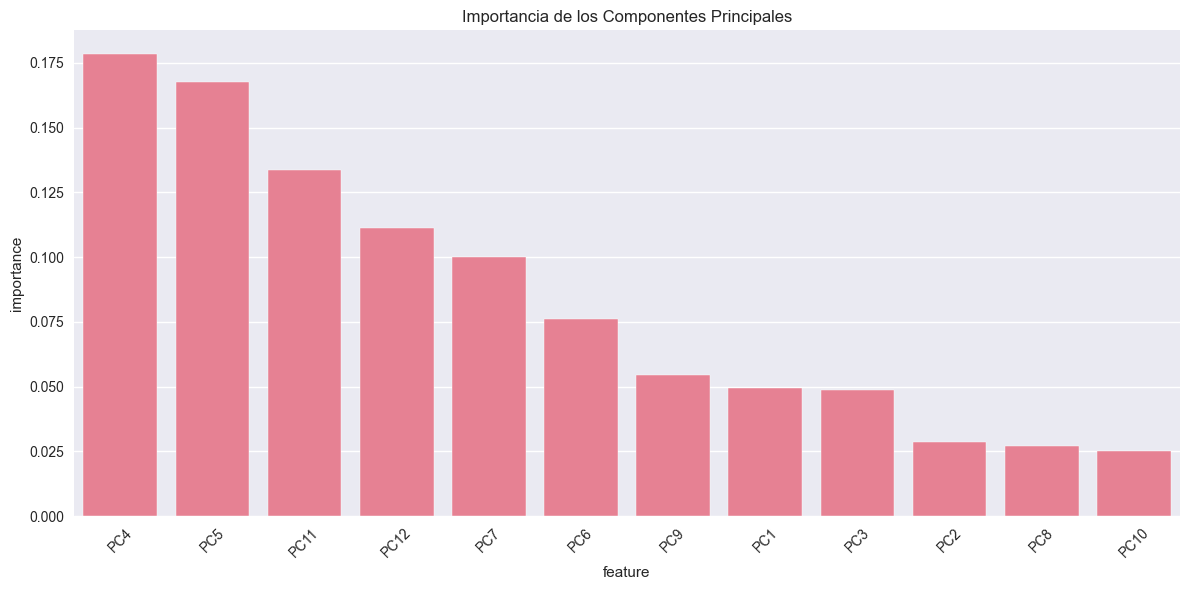


=== Importancia de Características ===
   feature  importance
3      PC4    0.178577
4      PC5    0.167736
10    PC11    0.133510
11    PC12    0.111042
6      PC7    0.099891
5      PC6    0.076177
8      PC9    0.054478
0      PC1    0.049346
2      PC3    0.048662
1      PC2    0.028608
7      PC8    0.027018
9     PC10    0.024957


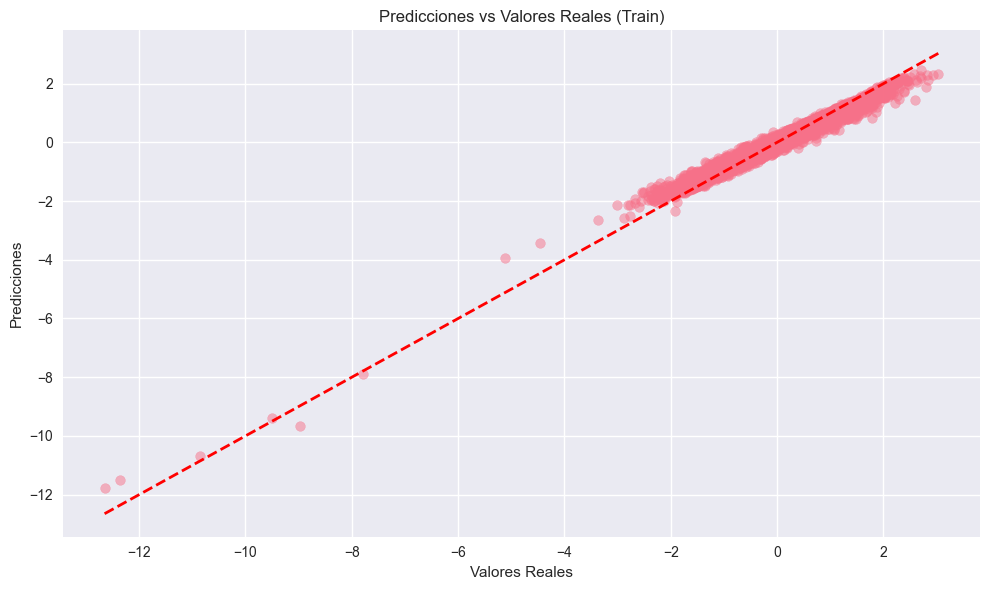

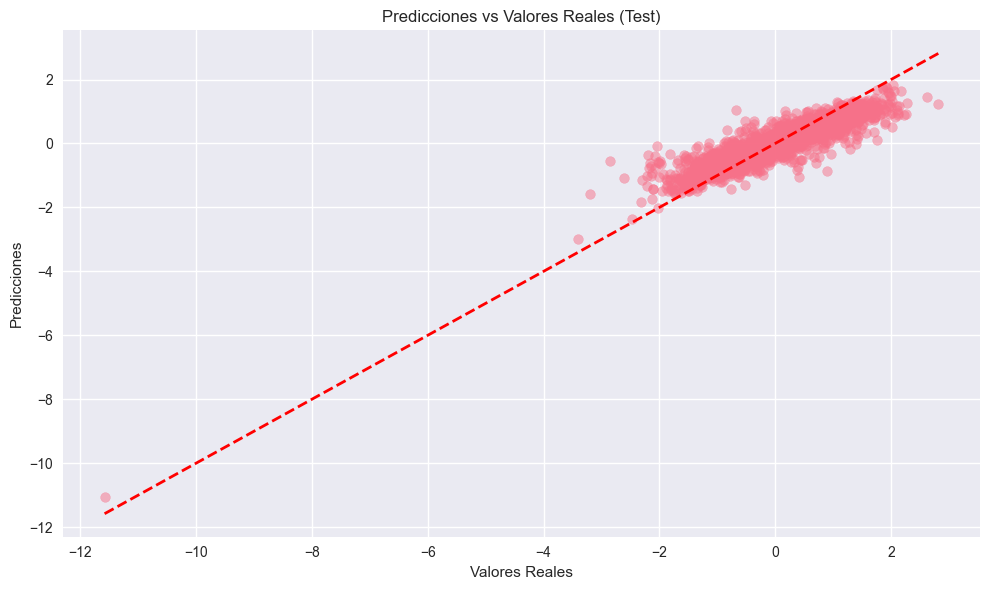


=== Ejemplos de Predicciones ===
         Actual  Predicho     Error
5421  -0.199603 -0.245787  0.046184
4228  -0.962746 -0.656699  0.306047
10024 -1.336736 -1.197201  0.139536
7731  -0.335586 -0.251310  0.084276
6832  -0.106125 -0.488436  0.382311
...         ...       ...       ...
10841 -0.949031 -0.675449  0.273583
8536  -0.533457 -0.370158  0.163299
1877  -0.084224 -0.511197  0.426974
10996 -0.770170 -0.397253  0.372917
513   -0.341415 -0.166042  0.175373

[2218 rows x 3 columns]

=== Ejemplo de Nueva Predicción ===
Predicción para nuevo dato: -0.2458


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Configuración para mejor visualización
plt.style.use('seaborn')
sns.set_palette("husl")

def load_data(file_path):
    """
    Carga los datos desde un archivo CSV
    """
    try:
        data = pd.read_csv(file_path)
        print(f"Datos cargados exitosamente. Shape: {data.shape}")
        return data
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None

def prepare_data(df, target_pc='PC13', test_size=0.2):
    """
    Prepara los datos para el entrenamiento
    """
    # Separar features y target
    X = df.drop(target_pc, axis=1)
    y = df[target_pc]

    # División train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train, n_estimators=100):
    """
    Entrena el modelo de Random Forest
    """
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )

    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evalúa el modelo y retorna métricas
    """
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    metrics = {
        'train_mse': mean_squared_error(y_train, y_pred_train),
        'test_mse': mean_squared_error(y_test, y_pred_test),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test)
    }

    return metrics, y_pred_train, y_pred_test

def plot_feature_importance(model, feature_names):
    """
    Visualiza la importancia de las características
    """
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    importance = importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='feature', y='importance', data=importance)
    plt.xticks(rotation=45)
    plt.title('Importancia de los Componentes Principales')
    plt.tight_layout()
    plt.show()

    return importance

def plot_predictions(y_true, y_pred, title):
    """
    Visualiza las predicciones vs valores reales
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def main():
    # 1. Cargar datos
    # Crear DataFrame de ejemplo con los datos proporcionados
    data = pd.read_csv("pca_reduced_dataset.csv")

    # 2. Preparar datos
    X_train, X_test, y_train, y_test = prepare_data(data)

    # 3. Entrenar modelo
    model = train_model(X_train, y_train)

    # 4. Evaluar modelo
    metrics, y_pred_train, y_pred_test = evaluate_model(model, X_train, X_test, y_train, y_test)

    # 5. Mostrar resultados
    print("\n=== Métricas del Modelo ===")
    print(f"MSE (Train): {metrics['train_mse']:.4f}")
    print(f"MSE (Test): {metrics['test_mse']:.4f}")
    print(f"RMSE (Train): {metrics['train_rmse']:.4f}")
    print(f"RMSE (Test): {metrics['test_rmse']:.4f}")
    print(f"MAE (Train): {metrics['train_mae']:.4f}")
    print(f"MAE (Test): {metrics['test_mae']:.4f}")
    print(f"R² (Train): {metrics['train_r2']:.4f}")
    print(f"R² (Test): {metrics['test_r2']:.4f}")

    # 6. Visualizar importancia de características
    importance = plot_feature_importance(model, X_train.columns)
    print("\n=== Importancia de Características ===")
    print(importance)

    # 7. Visualizar predicciones
    plot_predictions(y_train, y_pred_train, 'Predicciones vs Valores Reales (Train)')
    plot_predictions(y_test, y_pred_test, 'Predicciones vs Valores Reales (Test)')

    # 8. Guardar predicciones
    predictions_df = pd.DataFrame({
        'Actual': y_test,
        'Predicho': y_pred_test,
        'Error': np.abs(y_test - y_pred_test)
    })
    print("\n=== Ejemplos de Predicciones ===")
    print(predictions_df)

    # 9. Ejemplo de predicción con nuevos datos
    print("\n=== Ejemplo de Nueva Predicción ===")
    new_data = X_test.iloc[0].values.reshape(1, -1)
    prediction = model.predict(new_data)
    print(f"Predicción para nuevo dato: {prediction[0]:.4f}")

if __name__ == "__main__":
    main()